# Desafío LATAM Airlines

#### Vamos a cargar las librerías necesarias

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mpdates
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

#### Cargamos el dataset

In [3]:
df=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_14212\2106304581.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])


## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

Notamos que únicamente contamos con un dato que es nulo en la columna Vlo-O, asignémosle un valor arbitrario y veamos qué nos dice

In [13]:
df.fillna(0, inplace=True)

In [16]:
df[df['Vlo-O'] == 0]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,0,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


En este caso tenemos el vuelo programado LAW200 del 01/19/2017 que es despachado con un valor desconocido, al ser un sólo registro podemos o no prescindir de él (corresponde al 0.0015% del dataset)

In [ ]:
df.head

Mostremos algunas gráficas para entender cómo es la distribución de los datos

In [54]:
color_pal=['b','orange','g', 'r', 'purple', 'brown', 'pink', 'gray', 'gold',
                                                         'cyan', 'violet', 'yellow']

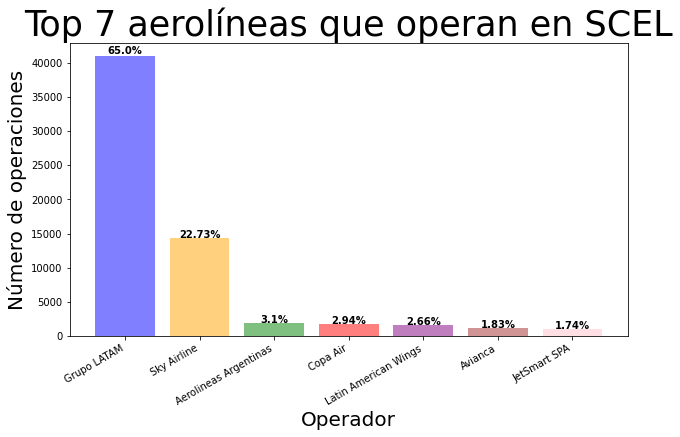

In [58]:
aer_top=[]
aer_top_count=[]
aer_tot=0
for i in range (7):
    aer_top.append(df.OPERA.value_counts().index[i])
    aer_top_count.append(df.OPERA.value_counts()[i])
    aer_tot+=df.OPERA.value_counts()[i]
fig = plt.figure(figsize = (10,6))
ax = plt.bar(aer_top, aer_top_count, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(aer_top_count[i]*100/aer_tot, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 7 aerolíneas que operan en SCEL', fontsize=35)
plt.xlabel('Operador', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

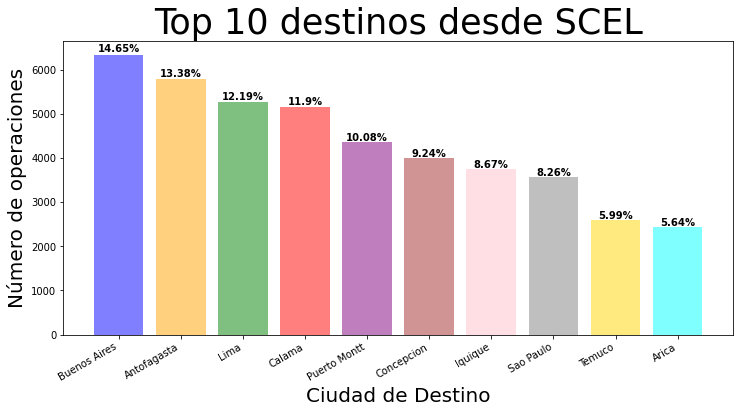

In [57]:
des_top=[]
des_top_count=[]
des_tot=0
for i in range (10):
    des_top.append(df.SIGLADES.value_counts().index[i])
    des_top_count.append(df.SIGLADES.value_counts()[i])
    des_tot+=df.SIGLADES.value_counts()[i]
fig = plt.figure(figsize = (12,6))
ax = plt.bar(des_top, des_top_count, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(des_top_count[i]*100/des_tot, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 10 destinos desde SCEL', fontsize=35)
plt.xlabel('Ciudad de Destino', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

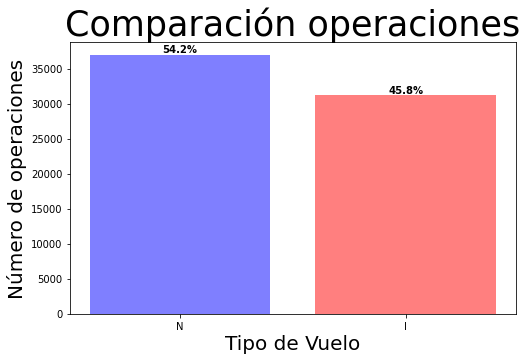

In [67]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(df.TIPOVUELO.value_counts().index, df.TIPOVUELO.value_counts(), alpha=0.5, color=['b', 'r'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df.TIPOVUELO.value_counts()[i]*100/df.TIPOVUELO.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Comparación operaciones', fontsize=35)
plt.xlabel('Tipo de Vuelo', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

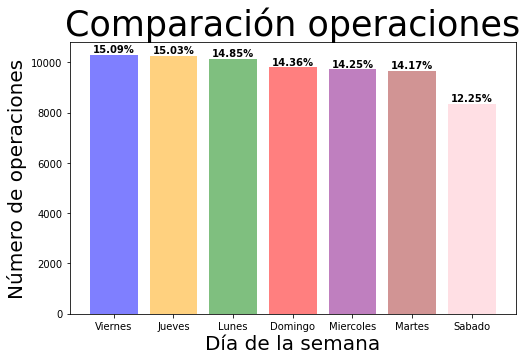

In [114]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(df.DIANOM.value_counts().index, df.DIANOM.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df.DIANOM.value_counts()[i]*100/df.DIANOM.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Comparación operaciones', fontsize=35)
plt.xlabel('Día de la semana', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

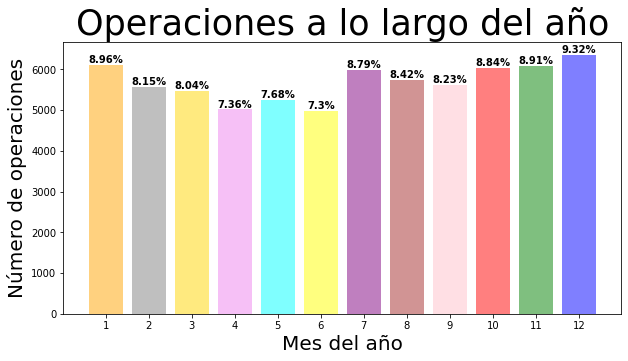

In [92]:
fig = plt.figure(figsize = (10,5))
ax = plt.bar(df.MES.value_counts().index, df.MES.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df.MES.value_counts()[df.MES.value_counts().index[i]]*100/df.MES.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones a lo largo del año', fontsize=35)
plt.xlabel('Mes del año', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.xticks(df.MES.value_counts().index)
plt.show()

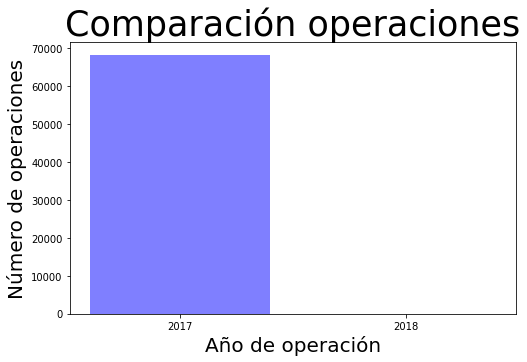

In [98]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(df.AÑO.value_counts().index, df.AÑO.value_counts(), alpha=0.5, color=color_pal)
plt.title('Comparación operaciones', fontsize=35)
plt.xlabel('Año de operación', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.xticks(df.AÑO.value_counts().index); 
plt.show()

### Separemos en 2 lo que podemos concluir de los datos, en primer lugar (1) concluyamos lo acerca de lo que se podría pensar sin haber revisado los datos y en segundo lugar (2) aquello que se pudo concluir una vez haciendo un pequeño análisis.

### (1)

- Los datos son del año 2017.

- Existe una tendencia de disminución de operaciones una vez comenzado el año (debido a la demanda por fiestas de finde año del año pasado) y hay un pico de aumento una vez que se llega al período de verano (en gral. vacaciones) el cual decrece un poco por el final de dicho período; sin embargo, vuelve a aumentar por las fechas de fin de año alcanzando su máximo en Disiembre (mes 12) donde, comercialmente, se ha estilado la reunión familiar.

- El Viernes es el día de la semana con más operaciones (podríamos pensar en que la mayoría de las personas trabajan de Lunes a Viernes y se aprovecha éste último día para salir y aprovechar el fin de semana), por el contrario, el Sábado es el día de menor número de operaciones (esto pues si no se viajó el Viernes o Jueves perdería un poco de sentido hacerlo el Sábado y tener completo sólo el día Domingo). Bajo éstas hipótesis tendría sentido que los días con menores operaciones fueran Miércoles, Martes y Sábado; sin embargo, sería necesario un estudio más detallado para considerarlas como válidas.

### (2)

- Prácticamente el 90% de las operaciones en SCEL son realizadas por 2 operadores: Grupo LATAM y Sky Airline, donde Grupo LATAM supera en casi 3:1 las operaciones de Sky Airline. Grupo LATAM se corona como el rey en SCEL.

- Las operaciones Internacionales (I) estan próximas a empatar las Nacionales (N) con un ~ 46% vs 54%. Debido a las libertades del aire sólamente Grupo LATAM y Sky Airline pueden ofrecer vuelos N.

- A pesar de sólo contar con una diferencia porcentual de prácticamente 4% entre las operaciones N e I, los destinos favoritos son N. Esto te habla de la predilección del consumidor a los destinos locales (turismo, trabajo, etc.) y de la gran oferta de destinos que el aeropuerto puede ofrecer. Si, por algún motivo, se redujera el número de destinos I contundentemente los destinos N ganarían a los I.

- Los análisis que se puedan hacer dependen en gran medida de grupo LATAM y Sky Airline, siendo el primero el que mayor repercusión causaría y se podría pensar en una división entre lo que hace este par de grupos y lo que hacen los demás.

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

### - temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.


Tomamos los segmentos que nos piden lo cual nos dan variables booleanas, entonces las multiplicamos por 1 como un arreglo de numpy (para no tener que iterar) para transformarlos en 0 y 1 como se nos pide y todo esto lo agregamos a una nueva columna llamada temporada_alta

In [99]:
df['temporada_alta']=(np.multiply(df['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (df['Fecha-I'].dt.month == 9), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.month == 7), 1)) + (np.multiply((df['Fecha-I'].dt.day <= 3) & (df['Fecha-I'].dt.month == 3), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 1) & (df['Fecha-I'].dt.month < 3), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.month >=12), 1))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_14212\4078920077.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df['temporada_alta']=(np.multiply(df['Fecha-I'].dt.day.between(11, 30, inclusive = True) & (df['Fecha-I'].dt.month == 9), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.month == 7), 1)) + (np.multiply((df['Fecha-I'].dt.day <= 3) & (df['Fecha-I'].dt.month == 3), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 1) & (df['Fecha-I'].dt.month < 3), 1)) + (np.multiply((df['Fecha-I'].dt.day >= 15) & (df['Fecha-I'].dt.month >=12), 1))


### - dif_min : diferencia en minutos entre Fecha-O y Fecha-I .


Como trabajo con date2num lo que obtengo es el factor de conversión para minutos de manera general y que se obtenga de manera automática sin tener que revisar primero la información; es decir, una vez que se corra la línea no se tiene que buscar manualmente cómo obtener dicho factor si es que el dataset cambia.

Una vez que tengo el factor utilizo un arreglo de numpy para obtener el valor del tiempo en minutos, lo redondeo a 0 decimales y cambio el tipo de dato por entero para tenerlo como se nos pide y esos valores son agregados a la columna dif_min.

In [100]:
factor=(df['Fecha-O']-df['Fecha-I']).map(mpdates.date2num)[0]/((df['Fecha-O'][0]-df['Fecha-I'][0]).seconds/60)

In [101]:
df['dif_min'] = np.round((df['Fecha-O']-df['Fecha-I']).map(mpdates.date2num)/factor, 0).astype(int)

### - atraso_15 : 1 si dif_min > 15, 0 si no.


Similar al primer punto, genero el arreglo booleano y lo multiplico por 1 para obtener valores 0 y 1, y son agregados a la columna atraso_15

In [102]:
df['atraso_15'] = np.multiply((df.dif_min > 15), 1)

###  periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

Se utiliza una manera diferente de obtenerlo, ahora se generan las condiciones junto con sus opciones y se elige la opción "más complicada" para dejarlo como valor default con select de numpy y se agrega a la columna periodo_dia

In [103]:
condit = [(df['Fecha-I'].dt.hour >= 5) & (df['Fecha-I'].dt.hour < 12),
         (df['Fecha-I'].dt.hour >= 12) & (df['Fecha-I'].dt.hour < 19)]
choice = ['mañana', 'tarde']

In [104]:
df['periodo_dia'] = np.select(condit, choice, default='noche')

Exportamos ahora a un csv, primero creamos un DataFrame vacío al cual le agregaremos las columnas creadas y lo exportamos a un csv on el nombre que se nos pidió

In [105]:
sf=pd.DataFrame

In [106]:
sf=df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]

In [107]:
sf.to_csv('synthetic_features.csv', index=False)

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?¿Qué variables esperarías que más influyeran en predecir atrasos?

### Previo a la tasa de atrasos, veamos cómo es su distribución respecto del total de vuelos

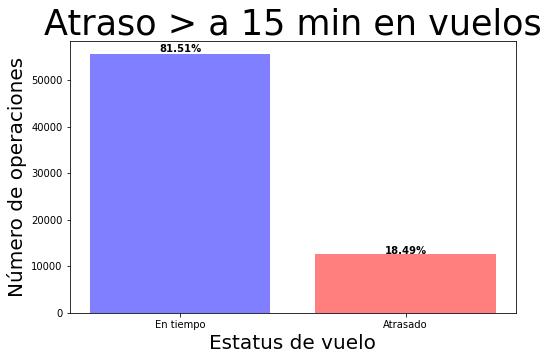

In [108]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(['En tiempo', 'Atrasado'], df.atraso_15.value_counts(), alpha=0.5, color=['b', 'r'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df.atraso_15.value_counts()[i]*100/df.atraso_15.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Atraso > a 15 min en vuelos', fontsize=35)
plt.xlabel('Estatus de vuelo', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=20)
plt.show()

### Prácticamente una quinta parte de los vuelos cuentan con una demora mayor de 15 minutos; es decir, es considerable.

### Veamos ahora sí cómo es este estraso con respecto a las demás variables:

Antes que nada, crearemos un nuevo DataFrame con la información sólo de los atrasos

In [110]:
atraso=df[df.atraso_15 > 0]

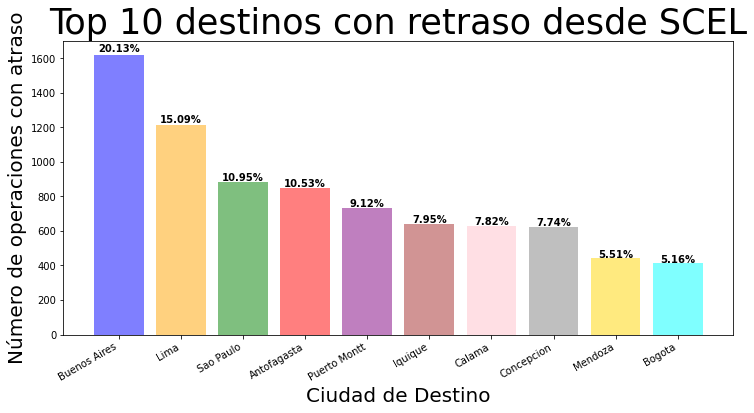

In [111]:
des_top_a=[]
des_top_count_a=[]
des_tot_a=0
for i in range (10):
    des_top_a.append(atraso.SIGLADES.value_counts().index[i])
    des_top_count_a.append(atraso.SIGLADES.value_counts()[i])
    des_tot_a+=atraso.SIGLADES.value_counts()[i]
fig = plt.figure(figsize = (12,6))
ax = plt.bar(des_top_a, des_top_count_a, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(des_top_count_a[i]*100/des_tot_a, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 10 destinos con retraso desde SCEL', fontsize=35)
plt.xlabel('Ciudad de Destino', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=20)
plt.show()

No es de extrañarnos que las ciudades hacia las que hay más operaciones tengan la mayor cantidad de atrasos.

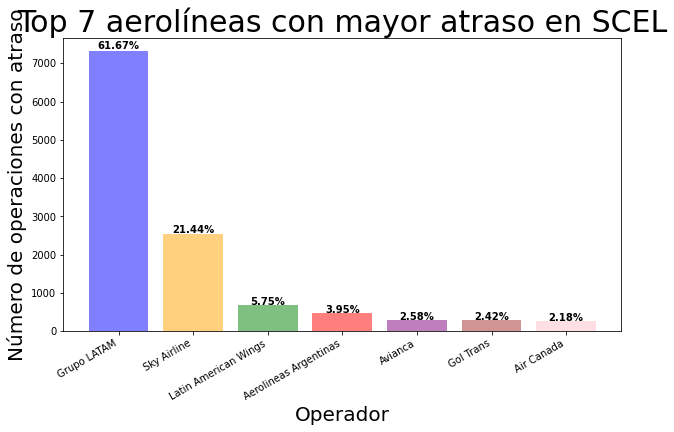

In [112]:
aer_top_a=[]
aer_top_count_a=[]
aer_tot_a=0
for i in range (7):
    aer_top_a.append(atraso.OPERA.value_counts().index[i])
    aer_top_count_a.append(atraso.OPERA.value_counts()[i])
    aer_tot_a+=atraso.OPERA.value_counts()[i]
fig = plt.figure(figsize = (10,6))
ax = plt.bar(aer_top_a, aer_top_count_a, alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(aer_top_count_a[i]*100/aer_tot_a, 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
fig.autofmt_xdate()
plt.title('Top 7 aerolíneas con mayor atraso en SCEL', fontsize=30)
plt.xlabel('Operador', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=20)
plt.show()

Tampoco es de extrañar que grupo LATAM lidere como operador con mayores atrasos si es la aerolínea que más operaciones realiza, de hecho las primeras 4 coinciden con el top7 de operadores en SCEL (se puede pensar que la variación de los restantes se debe a las bajas operaciones y variaciones muy pequeñas o aleatorias los dejan fuera o dentro del top)

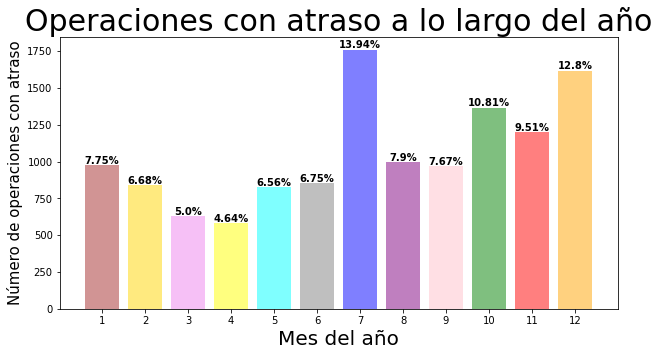

In [113]:
fig = plt.figure(figsize = (10,5))
ax = plt.bar(atraso.MES.value_counts().index, atraso.MES.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.MES.value_counts()[atraso.MES.value_counts().index[i]]*100/atraso.MES.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso a lo largo del año', fontsize=30)
plt.xlabel('Mes del año', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.xticks(atraso.MES.value_counts().index)
plt.show()

De nueva cuenta parece una copia conceptual de los datos globales, con un pico en las temporadas altas; sin embargo, el comienzo con un número bajo comparado con el final (1 vs 12) podría ser un factor interesante cuya causa resida en la expectativa de cada trabajador implicado en la operación a comienzos del año, nuevos propósitos y una "renovación" personal que se va diluyendo en el transcurso del año (es una hipótesis y se necesitaría mayor información para tomarla odesecharla)

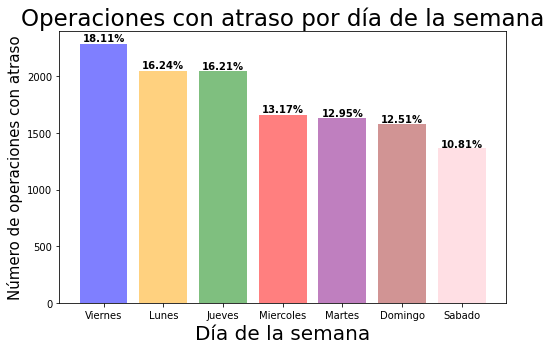

In [115]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.DIANOM.value_counts().index, atraso.DIANOM.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.DIANOM.value_counts()[i]*100/atraso.DIANOM.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso por día de la semana', fontsize=23)
plt.xlabel('Día de la semana', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

En este caso no sólo los días, sino la diferencia entre el máximo y el mínimo cambian. Considerando el total de operaciones, el promedio se mantene cerca entre los valores (menos de 2 puntos porcentuales) y en el caso de sólo los vuelos con atraso la diferencia es mayor (de hasta 4 puntos porcentuales)

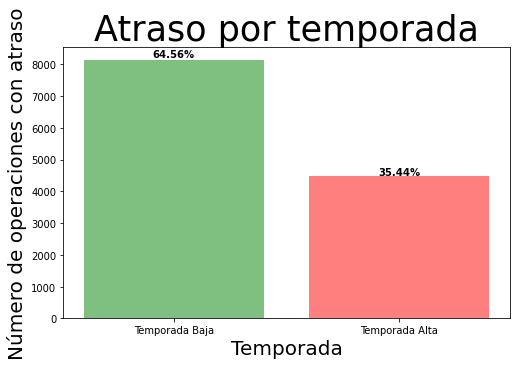

In [116]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(['Temporada Baja', 'Temporada Alta'], atraso.temporada_alta.value_counts(), alpha=0.5, color=['g', 'r'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.temporada_alta.value_counts()[i]*100/atraso.temporada_alta.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Atraso por temporada', fontsize=35)
plt.xlabel('Temporada', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=20)
plt.show()

Entonces, la temprada es factor... No tan rápido, recordemos que, según la información proporcionada los días de temporada alta y baja no son, en cantidad, iguales. De hecho la proporción es similar al gráfico anterior 2:1 con 249 días de temporada baja y 116 de alta (considerando un año de 365 días).

Para darle una posible solución sacaremos la densidad como atraso/días

In [119]:
atb=atraso.temporada_alta.value_counts()[0]/249

In [120]:
ata=atraso.temporada_alta.value_counts()[1]/116

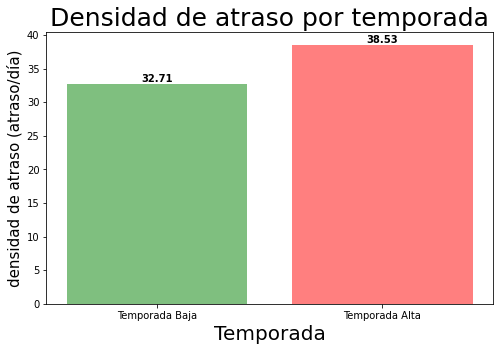

In [125]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(['Temporada Baja', 'Temporada Alta'], [atb, ata], alpha=0.5, color=['g', 'r'])
at=[atb, ata]
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(at[i], 2)),
             ha='center',
             weight='bold')
    i+=1
plt.title('Densidad de atraso por temporada', fontsize=25)
plt.xlabel('Temporada', fontsize=20)
plt.ylabel('densidad de atraso (atraso/día)', fontsize=15)
plt.show()

In [129]:
por_atra=round((ata-atb)*100/atb, 2)

In [130]:
print('la temporada alta supera a la temporada baja en atraso con un porcentaje de:', por_atra, '%')

la temporada alta supera a la temporada baja en atraso con un porcentaje de: 17.82 %


Ahora sí, aprece ser que la temporada es un factor pues, por día, suceden más atrasos en temporada alta que en baja (un 18% más de atrasos)

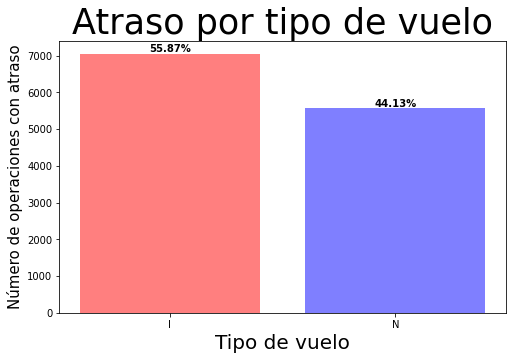

In [132]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.TIPOVUELO.value_counts().index, atraso.TIPOVUELO.value_counts(), alpha=0.5, color=['r', 'b'])
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.TIPOVUELO.value_counts()[i]*100/atraso.TIPOVUELO.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Atraso por tipo de vuelo', fontsize=35)
plt.xlabel('Tipo de vuelo', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

En este caso los vuelos internacionales son los que más se atrasan, si recordamos los datos del inicio, del total de vuelos los nacionales son mayoría, no hace falta un análisis como el anterior para entender que si los vuelos N superan a los I y los vuelos N se demoran menos entonces la mayor parte de los atrasos vienen de parte de los vuelos I

No nos olvidemos que falta analizar el período de tiempo y las operaciones, tomemos primero el gráfico global y después el de sólo los atrasos:

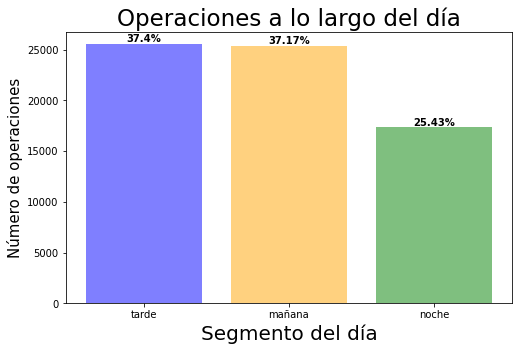

In [133]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(df.periodo_dia.value_counts().index, df.periodo_dia.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(df.periodo_dia.value_counts()[i]*100/df.periodo_dia.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones a lo largo del día', fontsize=23)
plt.xlabel('Segmento del día', fontsize=20)
plt.ylabel('Número de operaciones', fontsize=15)
plt.show()

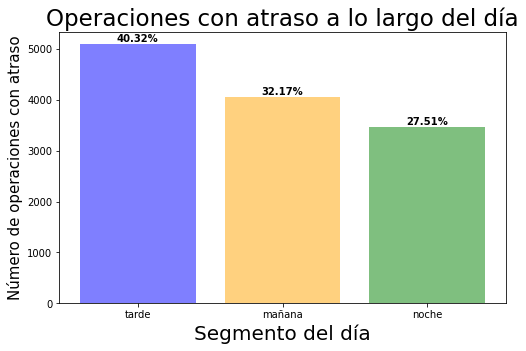

In [135]:
fig = plt.figure(figsize = (8,5))
ax = plt.bar(atraso.periodo_dia.value_counts().index, atraso.periodo_dia.value_counts(), alpha=0.5, color=color_pal)
i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(atraso.periodo_dia.value_counts()[i]*100/atraso.periodo_dia.value_counts().sum(), 2)) + '%',
             ha='center',
             weight='bold')
    i+=1
plt.title('Operaciones con atraso a lo largo del día', fontsize=23)
plt.xlabel('Segmento del día', fontsize=20)
plt.ylabel('Número de operaciones con atraso', fontsize=15)
plt.show()

En este caso se esperaba que los valores de la tarde y la mañana fueran similares; sin embargo, no fue así y nos da un indicio de variable para poder hacer el modeloado de los datos

### Por lo tanto, las variables que esperaría tuvieran influencia en la predicción son: mes del año, día de la semana, temporada, tipo de vuelo y segmento del día

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.


### En este caso analicé los siguientes modelos:
- K-nn
- SVM con 4 kernel diferente (sigmoide, gaussiano, linear y polinómico, este último con un polinomio de grado 2, 3 y 4)
- Bayessiano
- Arbol de decisión con datos escalados y no escalados
- Random Forest
- Redes Neuronales Artificiales
- Reducción de la dimensionalidad con ACP
- XGBoost escalado y no escalado
- Modelos de detección de fraudes bancarios con librería keras

Por la cantidad de modelos no los agregaré al presente trabajo; si embargo colocaré los dos modelos que me parecieron más convenientes y en el siguiente punto (5) explicaré el por qué de mis acciones

### ANN o Red Neuronal Artificial

In [ ]:
X = data.iloc[:, [11, 13, 14, 18, 21]].values
y = data.iloc[:, 20].values
LabelEncoder_X1=LabelEncoder()
X[:, 1] = LabelEncoder_X1.fit_transform(X[:, 1])
LabelEncoder_X2=LabelEncoder()
X[:, 2] = LabelEncoder_X2.fit_transform(X[:, 2])
LabelEncoder_X4=LabelEncoder()
X[:, 4] = LabelEncoder_X4.fit_transform(X[:, 4])

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],   
    remainder='passthrough')

X = np.array(ct.fit_transform(X), dtype=np.float)

X = X[:, 1:]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

clasificador=Sequential()
clasificador.add(Dense(units=6, kernel_initializer='uniform',
                       activation='relu', input_dim=10))
clasificador.add(Dense(units=6, kernel_initializer='uniform',
                       activation='relu'))
clasificador.add(Dense(units=1, kernel_initializer='uniform',
                       activation='sigmoid'))
clasificador.compile(optimizer='adam', loss='binary_crossentropy',
                     metrics=['accuracy'])

In [ ]:
clasificador.fit(X_train, y_train, epochs=100, batch_size=10)

In [ ]:
y_pred_aan = clasificador.predict(X_test)

In [ ]:
y_pred25 = (y_pred>=0.25)
cm=confusion_matrix(y_test, y_pred25)
print(cm)

In [ ]:
print(classification_report(y_test, y_pred25))

### Detección de fraudes

In [ ]:
dim_entrada = X_train.shape[1]
capa_entrada = Input(shape=(dim_entrada,))

encoder = Dense(4, activation='tanh')(capa_entrada)
encoder = Dense(2, activation='relu')(encoder)

decoder = Dense(4, activation='tanh')(encoder)
decoder = Dense(10, activation='relu')(decoder)

autoencoder = Model(inputs=capa_entrada, outputs=decoder)

autoencoder.compile(optimizer='sgd', loss='mse')

autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test,X_test), verbose=1)

X_pred = autoencoder.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)

In [ ]:
y_pred2 = (ecm>=0.2)

In [ ]:
cm=confusion_matrix(y_test, y_pred2)
print(cm)

In [ ]:
print(classification_report(y_test, y_pred2))

### Combinando ambos modelos

In [ ]:
ecm2=ecm.reshape(13642,1)

In [ ]:
y_tot_p = y_pred_aa + ecm2

In [ ]:
y_tot_p_44 = y_tot_p > 0.41

In [ ]:
cm=confusion_matrix(y_test, y_tot_p_44)
print(cm)

In [ ]:
print(classification_report(y_test, y_tot_p_44))

## 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?
